Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


D:\Computer Software\Python\Main\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 894ms/step - accuracy: 0.5306 - loss: 0.7713 - val_accuracy: 0.5720 - val_loss: 0.6769
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6117 - loss: 0.6641 - val_accuracy: 0.5720 - val_loss: 0.6831
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.6339 - loss: 0.6455 - val_accuracy: 0.5950 - val_loss: 0.6672
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.6643 - loss: 0.6145 - val_accuracy: 0.5340 - val_loss: 0.6881
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.6767 - loss: 0.5995 - val_accuracy: 0.5880 - val_loss: 0.7087
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.6982 - loss: 0.5739 - val_accuracy: 0.5570 - val_loss: 0.6965
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.6783 - loss: 0.5913 - val_accuracy: 0.5710 - val_loss: 0.7018
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.7185 - loss: 0.5501 - val_accu

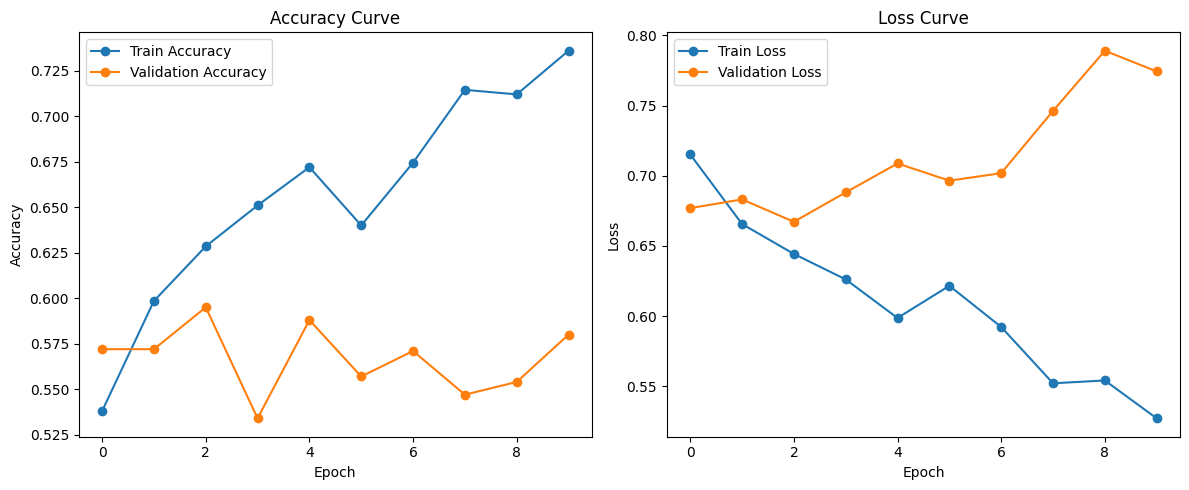

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 10

# Data directories
train_dir = "cats_and_dogs_filtered/train"
val_dir = "cats_and_dogs_filtered/validation"

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Define the LeNet model
def build_lenet():
    model = Sequential([
        Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
        Conv2D(6, kernel_size=5, activation='tanh', padding='same'),
        AveragePooling2D(pool_size=(2, 2)),

        Conv2D(16, kernel_size=5, activation='tanh'),
        AveragePooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Compile the model
model = build_lenet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step 


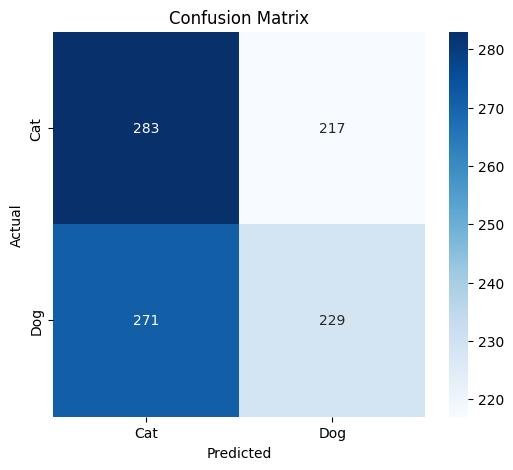


Classification Report:
              precision    recall  f1-score   support

         Cat       0.51      0.57      0.54       500
         Dog       0.51      0.46      0.48       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



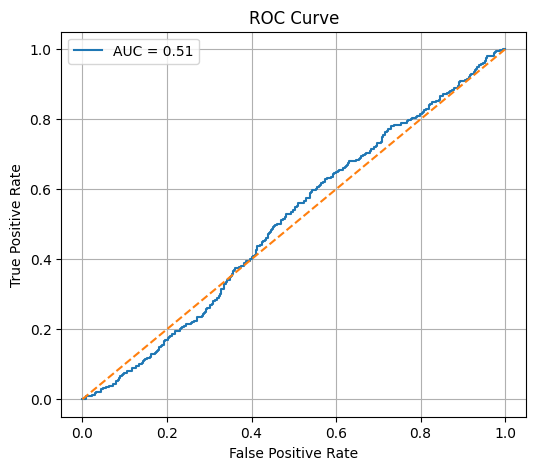

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import seaborn as sns

# Get true labels and predictions on validation set
val_data.reset()
y_true = val_data.classes
y_pred_prob = model.predict(val_data)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# 1. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
